<a href="https://colab.research.google.com/github/Kevin610-cpu/FDSFE_KCarter/blob/main/ClassDemo_10_21_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import missingno as msno
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [ ]:
url = "https://www1.nyc.gov/html/gbee/downloads/excel/nyc_benchmarking_disclosure_2017_consumption_data.xlsx"
df = pd.read_excel(url, "Information and Metrics")

In [ ]:
df

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),...,Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status
0,1,4593574,The Argonaut Building,NaN,NaN,1.010288e+09,1010287502,1024898,224 West 57th St,NaN,...,NaN,NaT,732.4,76.3,656.1,3635.5,21.46,Not found,2018-02-14,Not found
1,3,2967701,Cathedral Preparatory Seminary,NaN,NaN,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,NaN,...,NaN,NaT,164.5,109.9,54.6,102.9,1.09,Not found,2018-02-14,Not found
2,4,4898531,The Nomad Hotel,NaN,NaN,1.008290e+09,1-00829-0050,1080710,1170 Broadway,NaN,...,NaN,NaT,1150.2,438.0,712.3,10762.6,86.10,Not found,2018-02-14,Not found
3,5,2917939,10 West 27 Street Corp,NaN,NaN,1.008280e+09,1-00828-0053,1015657,1155 Broadway,NaN,...,NaN,NaT,273.4,98.2,175.3,790.1,15.80,Not found,2018-02-14,Not found
4,6,3878205,Westbury Realty,NaN,NaN,1.000650e+09,1-00065-0024,1001105,24 John Street,NaN,...,NaN,NaT,90.7,0.0,90.7,143.0,2.86,Not found,2018-02-14,Not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34350,34682,6682473,Mitchell Hill- 2802 Clarendon Road,NaN,NaN,3.051940e+09,3-05194-0001,3119966,2802 Clarendon Road,NaN,...,NaN,NaT,187.1,160.2,26.8,295851.5,9019.86,Not found,2019-03-07,Not found
34351,34683,6682474,Mitchell Hill- 1116 Carroll Street,NaN,NaN,3.012880e+09,3-01288-0038,3033818,1116 Carroll Street,NaN,...,NaN,NaT,181.2,157.7,23.5,283262.5,8756.18,Not found,2019-03-07,Not found
34352,34684,6682477,Mitchell Hill- 3033 Brighton 13 Street,NaN,NaN,3.087160e+09,3-08716-0085,3245653,3033 Brighton 13 Street,NaN,...,NaN,NaT,230.4,177.0,53.3,451795.0,13366.71,Not found,2019-03-07,Not found
34353,34685,2819133,The Ritz Tower - 465 Park Avenue,NaN,NaN,1.013128e+09,1-01312-7502,1036922,465 Park Avenue,NaN,...,NaN,NaT,614.8,23.7,591.1,7118.2,27.04,Not found,2019-03-08,Not found


In [ ]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2 (self-reported)', 'Postal Code', 'Street Number',
       'Street Name', 'Borough', 'DOF Gross Floor Area (ft²)',
       'Self-Reported Gross Floor Area (ft²)',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings', 'Occupancy', 'Metered Areas (Energy)',
       'Metered Areas  (Water)', 'ENERGY STAR Score', 'Source EUI (kBtu/ft²)',


In [ ]:
features = df[["Year Built", "Electricity Use - Grid Purchase (kBtu)"]]
features

,Year Built,Electricity Use - Grid Purchase (kBtu)
0,1909,6551394.1
1,1963,616343.7
2,1999,8033914.4
3,1994,1976691.9
4,2012,1022951.6
...,...,...
34350,1931,316524.4
34351,1925,277672.0
34352,1926,629677.8
34353,1910,6979300.9


In [ ]:
intial_shape = features.shape
intial_shape

(34355, 2)

In [ ]:
features.dropna(inplace=True)
features.info

<ipython-input-7-316266a4292f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)


<bound method DataFrame.info of        Year Built  Electricity Use - Grid Purchase (kBtu)
0            1909                               6551394.1
1            1963                                616343.7
2            1999                               8033914.4
3            1994                               1976691.9
4            2012                               1022951.6
...           ...                                     ...
34350        1931                                316524.4
34351        1925                                277672.0
34352        1926                                629677.8
34353        1910                               6979300.9
34354        1978                               2976628.9

[31576 rows x 2 columns]>

In [ ]:
features.describe()

,Year Built,Electricity Use - Grid Purchase (kBtu)
count,31576.000000,3.157600e+04
mean,1945.994141,3.833599e+06
std,32.791648,1.249719e+07
min,1051.000000,-6.343300e+03
25%,1924.000000,6.888429e+05
50%,1935.000000,1.249026e+06
75%,1964.000000,2.828563e+06
max,2021.000000,5.742834e+08


In [ ]:
features = features[features["Year Built"] > 1900]
features = features[features["Electricity Use - Grid Purchase (kBtu)"] > 0]

In [ ]:
features.shape

(30256, 2)

array([[<Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Electricity Use - Grid Purchase (kBtu)'}>]],
      dtype=object)

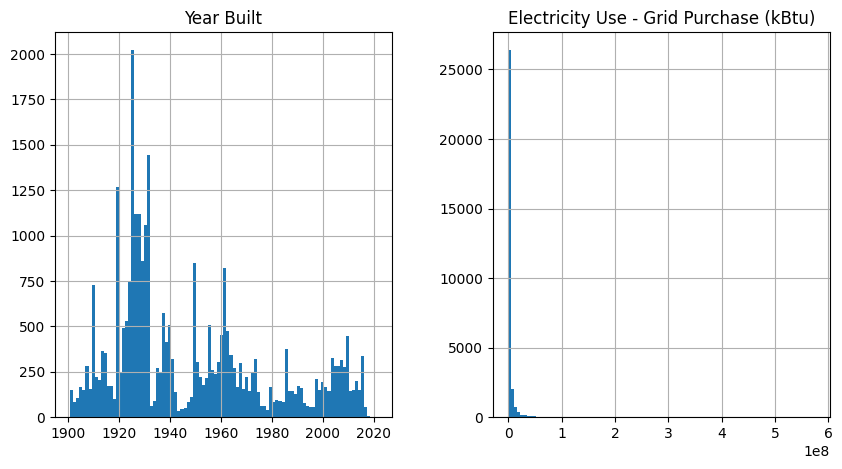

In [ ]:
features.hist(figsize = (10,5), bins = 100)

In [ ]:
features[elec_col] = np.log(features[elec_col])

<Axes: xlabel='Year Built', ylabel='Electricity Use - Grid Purchase (kBtu)'>

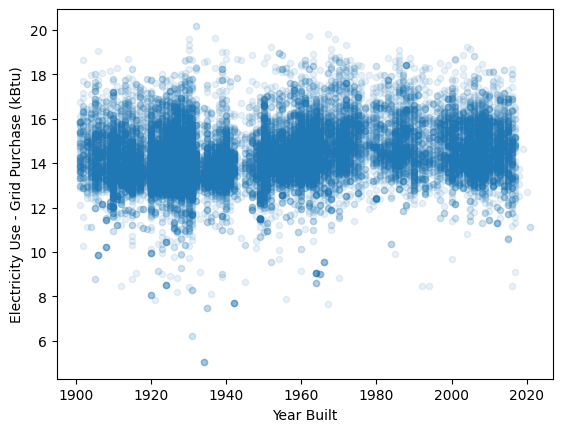

In [ ]:
features.plot(year_col,elec_col,kind="scatter",alpha=0.1)

In [ ]:
km = KMeans(n_clusters= 7, random_state=1415, verbose = True)
km.fit(features)

Initialization complete
Iteration 0, inertia 731748.0241464365.
Iteration 1, inertia 651805.4753329152.
Iteration 2, inertia 634526.173620073.
Iteration 3, inertia 628768.4391934496.
Iteration 4, inertia 621813.3835975677.
Iteration 5, inertia 621468.5143774562.
Converged at iteration 5: strict convergence.


KMeans(n_clusters=7, random_state=1415, verbose=True)

In [ ]:
km.n_clusters

7

In [ ]:
km.cluster_centers_

array([[1920.62634936,   13.86117386],
       [1962.94594595,   14.58488583],
       [2007.05493068,   14.64920044],
       [1944.52709745,   13.96670625],
       [1985.52578731,   14.92978041],
       [1928.73624517,   13.86307175],
       [1908.88350634,   14.16638396]])

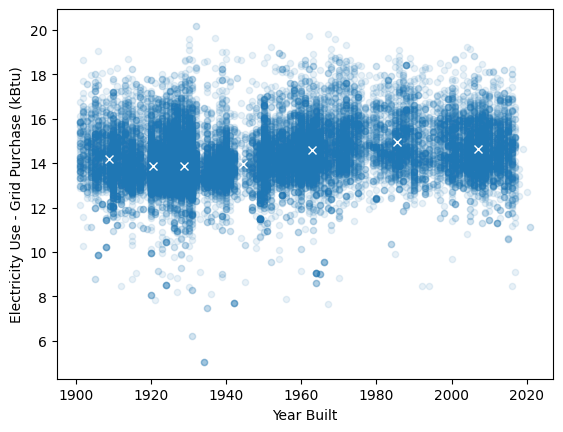

In [ ]:
year_col = "Year Built"
elec_col = "Electricity Use - Grid Purchase (kBtu)"

features.plot(year_col, elec_col, kind = "scatter", alpha = 0.1)

for i in range(km.n_clusters):
    x = km.cluster_centers_[i,0]
    y = km.cluster_centers_[i,1]
    plt.plot(x,y,"wx")

In [ ]:
km.labels_

array([6, 1, 2, ..., 5, 6, 4], dtype=int32)

(1895.0, 2027.0, 4.300626419123616, 20.92425291606683)

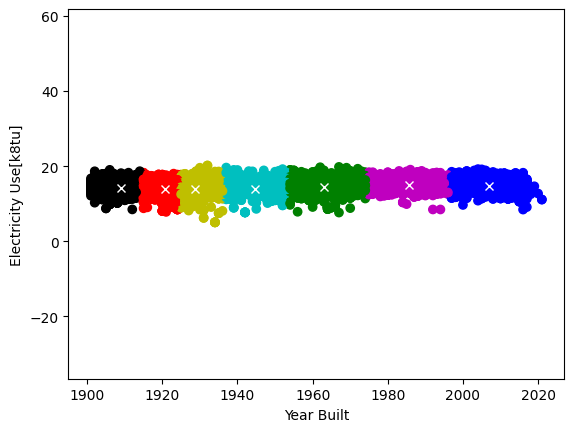

In [ ]:
colors = np.array(["r","g","b","c","m","y","k"])

plt.scatter(features[year_col], features[elec_col], color = colors[km.labels_])
for i in range(km.n_clusters):
    x = km.cluster_centers_[i,0]
    y = km.cluster_centers_[i,1]
    plt.plot(x,y,"wx")
plt.xlabel("Year Built")
plt.ylabel("Electricity Use[k8tu]")

plt.axis("equal")

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30256 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              30256 non-null  int64  
 1   Electricity Use - Grid Purchase (kBtu)  30256 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 709.1 KB


In [ ]:
features_scaled = preprocessing.scale(features.values, axis = 0)

In [ ]:
features_scaled

array([[-1.27684064,  1.22161645],
       [ 0.4866494 , -0.72041704],
       [ 1.66230942,  1.38922453],
       ...,
       [-0.72166785, -0.70283123],
       [-1.24418342,  1.27360186],
       [ 0.97650774,  0.57344184]])

In [ ]:
features_scaled_df = pd.DataFrame(features_scaled, columns = [year_col, elec_col])

In [ ]:
features_scaled_df.describe()

,Year Built,Electricity Use - Grid Purchase (kBtu)
count,3.025600e+04,3.025600e+04
mean,5.147771e-16,-8.266494e-16
std,1.000017e+00,1.000017e+00
min,-1.538098e+00,-7.519683e+00
25%,-7.543251e-01,-6.220408e-01
50%,-3.624384e-01,-1.409301e-01
75%,5.846211e-01,5.278800e-01
max,2.380768e+00,4.897144e+00


array([[<Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Electricity Use - Grid Purchase (kBtu)'}>]],
      dtype=object)

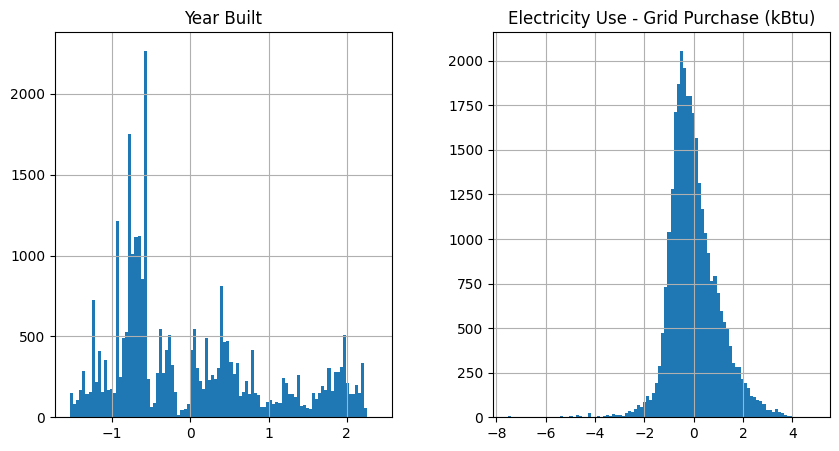

In [ ]:
features_scaled_df.hist(figsize=(10,5), bins = 100)

Text(0, 0.5, 'Electricity Use[k8tu]')

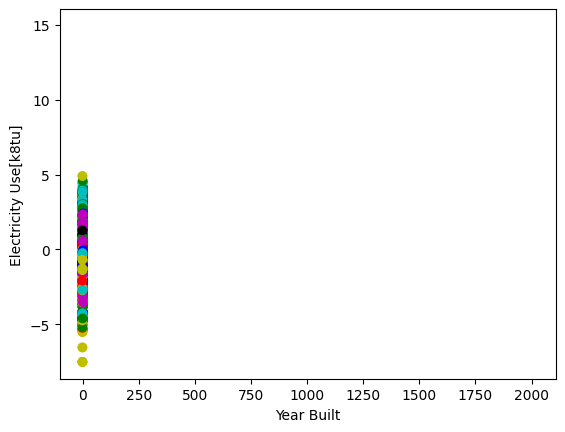

In [ ]:
colors = np.array(["r","g","b","c","m","y","k"])

plt.scatter(features_scaled_df[year_col], features_scaled_df[elec_col], color = colors[km.labels_])
for i in range(km.n_clusters):
    x = km.cluster_centers_[i,0]
    y = km.cluster_centers_[i,1]
    plt.plot(x,y,"wx")
plt.xlabel("Year Built")
plt.ylabel("Electricity Use[k8tu]")

